# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [31]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [33]:
%%R

# My commonly used R imports

require('tidyverse')

## Load the data

In [34]:
%%R
 
# Import data with R
df <- read_csv('311_processed.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 52
  `Unique Key` `Created Date`         `Closed Date`         Agency `Agency Name`
         <dbl> <chr>                  <chr>                 <chr>  <chr>        
1     59892199 12/31/2023 11:38:00 PM 01/05/2024 07:45:00 … DEP    Department o…
2     59889491 12/31/2023 11:17:00 PM 01/05/2024 07:30:00 … DEP    Department o…
3     59893098 12/31/2023 11:08:00 PM 01/05/2024 07:32:00 … DEP    Department o…
4     59886784 12/31/2023 10:53:00 PM 01/03/2024 09:24:00 … DEP    Department o…
# ℹ 47 more variables: `Complaint Type` <chr>, Descriptor <chr>,
#   `Location Type` <lgl>, `Incident Zip` <dbl>, `Incident Address` <chr>,
#   `Street Name` <chr>, `Cross Street 1` <chr>, `Cross Street 2` <chr>,
#   `Intersection Street 1` <lgl>, `Intersection Street 2` <lgl>,
#   `Address Type` <chr>, City <chr>, Landmark <lgl>, `Facility Type` <lgl>,
#   Status <chr>, `Due Date` <lgl>, `Resolution Description` <chr>,
#   `Resolution Action Updated Date` <chr>, `Community Board` <chr>, …


In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [35]:
%%R

# Load necessary library
library(dplyr)

# Read the dataset
df <- read.csv("311_processed.csv")

# Calculate the number of complaints per county
complaints_per_county <- df %>%
  group_by(COUNTY) %>%
  summarise(Number_of_Complaints = n())

# Calculate statistics
mean_complaints <- mean(complaints_per_county$Number_of_Complaints)
median_complaints <- median(complaints_per_county$Number_of_Complaints)
min_complaints <- min(complaints_per_county$Number_of_Complaints)
max_complaints <- max(complaints_per_county$Number_of_Complaints)
std_complaints <- sd(complaints_per_county$Number_of_Complaints)

# Print the results
cat("Mean number of complaints per county:", mean_complaints, "\n")
cat("Median number of complaints per county:", median_complaints, "\n")
cat("Minimum number of complaints per county:", min_complaints, "\n")
cat("Maximum number of complaints per county:", max_complaints, "\n")
cat("Standard Deviation of complaints per county:", std_complaints, "\n")


Mean number of complaints per county: 1547.4 
Median number of complaints per county: 1606 
Minimum number of complaints per county: 537 
Maximum number of complaints per county: 2560 
Standard Deviation of complaints per county: 783.9565 


In [37]:
%%R

library(dplyr)
library(tidyr)

discrete_variables <- c('Agency', 'Descriptor', 'Borough')

df %>% 
  select(all_of(discrete_variables)) %>%
  pivot_longer(cols = all_of(discrete_variables), names_to = "variable", values_to = "value") %>% 
  group_by(variable, value) %>% 
  summarize(count = n(), .groups = 'drop')

# A tibble: 7 × 3
  variable   value                    count
  <chr>      <chr>                    <int>
1 Agency     DEP                       7737
2 Borough    BRONX                     1077
3 Borough    BROOKLYN                  2560
4 Borough    MANHATTAN                 1595
5 Borough    QUEENS                    1968
6 Borough    STATEN ISLAND              537
7 Descriptor Noise, Barking Dog (NR5)  7737


## 1-D visualizations (aka distributions)


### Continuous variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

In [46]:
%%R

# code for plot 1
# make sure to make a meaningful title and subtitle



NULL


In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

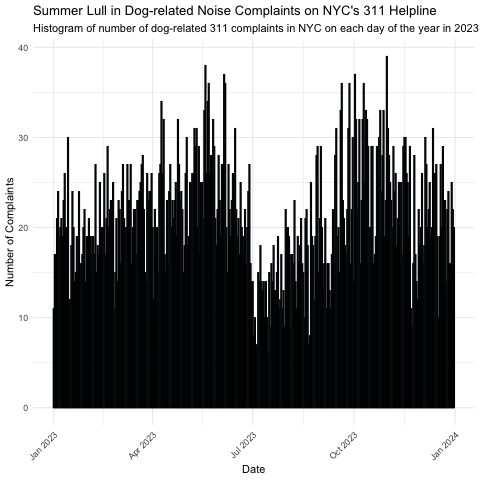

In [67]:
%%R
# code for plot 1
# make sure to make a meaningful title and subtitle


# Load necessary libraries
library(ggplot2)
library(lubridate)

# Read the dataset
data <- read.csv("311_processed.csv")

# Ensure 'Created Date' is in Date format
data$Created.Date <- mdy_hms(data$Created.Date)
data$Date <- as.Date(data$Created.Date)

# Plot the histogram with a bin for each day of the year
ggplot(data, aes(x=Date)) +
  geom_histogram(binwidth=1, fill="skyblue", color="black") +
  labs(title="Summer Lull in Dog-related Noise Complaints on NYC's 311 Helpline", subtitle='Histogram of number of dog-related 311 complaints in NYC on each day of the year in 2023', x="Date", y="Number of Complaints") +
  theme_minimal() +
  theme(axis.text.x=element_text(angle=45, hjust=1))




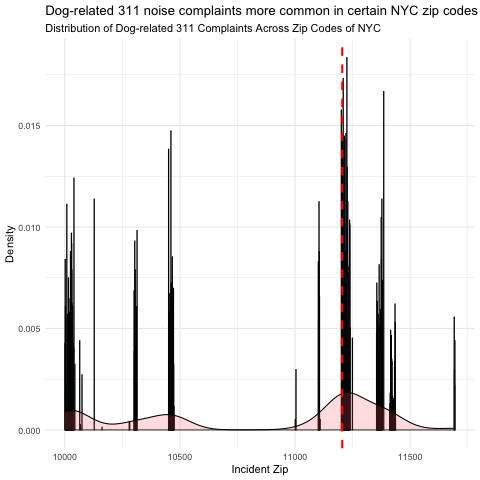

In [68]:
%%R

# code for plot 2
# make sure to make a meaningful title and subtitle

plot <- ggplot(df, aes(x=Incident.Zip)) + 
  geom_histogram(aes(y=..density..), binwidth=1, color="black", fill="lightblue") +
  geom_density(alpha=.2, fill="#FF6666") +
  geom_vline(aes(xintercept=median(Incident.Zip, na.rm=T)), color="red", linetype="dashed", size=1) +
  labs(title= 'Dog-related 311 noise complaints more common in certain NYC zip codes', 
       subtitle="Distribution of Dog-related 311 Complaints Across Zip Codes of NYC", 
       x="Incident Zip", y="Density") +
  theme_minimal()

# Display the plot
print(plot)

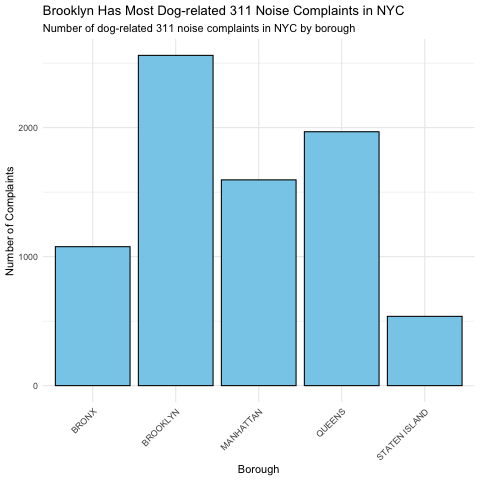

In [71]:
%%R
# code for plot 3
# make sure to make a meaningful title and subtitle

# Create a histogram of the number of complaints per Borough

ggplot(df, aes(x=Borough)) +
    geom_bar(fill="skyblue", color="black") +
    labs(title="Brooklyn Has Most Dog-related 311 Noise Complaints in NYC", subtitle="Number of dog-related 311 noise complaints in NYC by borough", x="Borough", y="Number of Complaints") +
    theme_minimal() +
    theme(axis.text.x=element_text(angle=45, hjust=1))
